# Set up relevant functions

total energy = 131433.06945386413


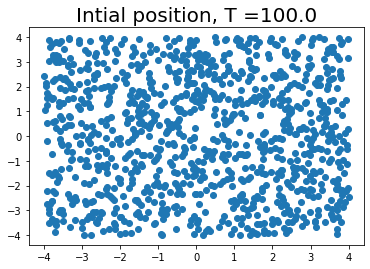

In [1]:
from math import cos, pi

T = 100.

def V(x,y):
    return 3*(x**2 + y**2 - 10*cos(2*pi*x) - 10*cos(2*pi*y)) # potential

def energy (state):
    """"
    Put in 4-array, get back energy
    """
    return V(state[0], state[1])+0.5*(state[2]**2 + state[3]**2)

def total_energy(gas):
    """"
    Put in 4xN array, get back total energy
    """
    
    E = 0.0
    for i in range(N):
        E += energy(gas[:,i])
    return E


def boltzmann_factor (state, temperature):
    """
    Input:
    state (4-array)
    
    Output:
    Boltzmann factor (float)
    
    state = (x,y,px,py). Calculates Boltzmann factor.
    Returns 0 if outside square.
    """
    
    if abs(state[0])>4. or abs(state[1])> 4.:
        return 0
    else:
        return np.exp(-energy(state)/temperature)    
    
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# number of particles
N = 1000


#Give intial conditions for gas

atoms = np.zeros((4,N))

# Uniformly distribute atoms
atoms[0:2][:] = np.random.uniform(-4., 4., (2,N))

# Give normal distribution for momentums

atoms[2][:] = np.random.normal(0,T**0.5, N)
atoms[3][:] = np.random.normal(0,T**0.5, N)


plt.plot(atoms[0][:], atoms[1][:], ls = 'None', marker = 'o')
plt.title("Intial position, T =" + str(T), fontsize = 20)

print("total energy =", total_energy(atoms))


ave energy =  120761.41049694034
acceptance =  0.866925591032432


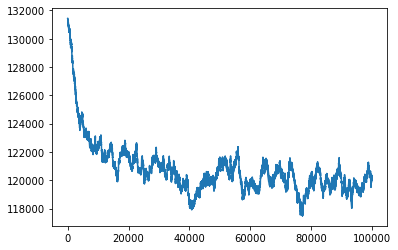

In [2]:
i = 0
j = 0
acc = 0.0
M = 10**5
eps = 0.5

eng = np.zeros(M)
eng[0] = total_energy(atoms)

# Tries this from i=0 to  i= M-1


while (i<M-1):
    # Pick random particle
    k = np.random.randint(N)
    state_particle_k = atoms[:,k]
    
    # Get new state of particle    
    new_state = state_particle_k + eps*(np.random.rand(4)-0.5)
    
    #If more probable, update
    if boltzmann_factor(new_state,T) >= boltzmann_factor(state_particle_k,T):    
        Delta_E = energy(new_state) - energy(state_particle_k) 
        eng[i+1] = eng[i] + Delta_E 
        
        atoms[:,k] = new_state
        
        
        
        i += 1
    # Otherwise, flip a bised coin
    else:
        r = np.random.rand()
        
        if boltzmann_factor(new_state,T) > r*boltzmann_factor(state_particle_k,T):    
            Delta_E = energy(new_state) - energy(state_particle_k) 
            eng[i+1] = eng[i] + Delta_E 
            
            atoms[:,k] = new_state
            
            
        
            i += 1   
        else:
            j += 1
           
print("ave energy = ", np.mean(eng))
print("acceptance = ", i/(i+j))


plt.plot(range(M),eng)


Text(0.5, 1.0, 'Energy')

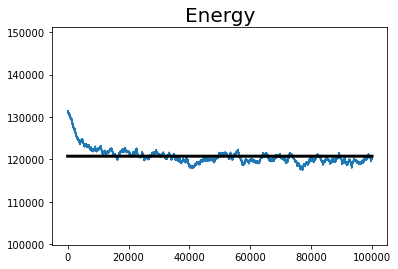

In [3]:
plt.plot(range(M),eng)
plt.plot(range(M),np.mean(eng)*np.ones(M), color = 'k', linewidth = 3)
plt.ylim((0.85*np.amin(eng),1.15*np.amax(eng)))
plt.title("Energy", fontsize = 20)


Text(0.5, 1.0, 'Position after MCMC, T = 100.0')

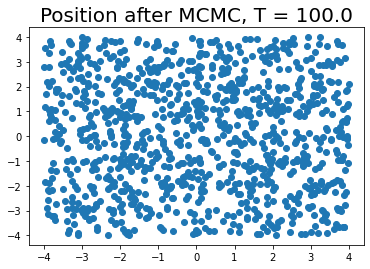

In [4]:
plt.plot(atoms[:][0], atoms[:][1], ls = 'None', marker = 'o')
plt.title("Position after MCMC, T = " + str(T), fontsize = 20)

Text(0.5, 1.0, 'Momentum after MCMC, T = 100.0')

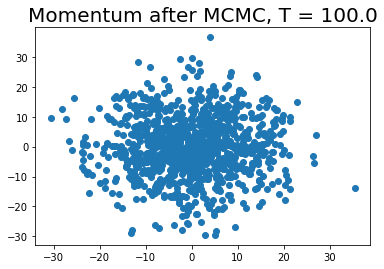

In [5]:
plt.plot(atoms[:][2], atoms[:][3], ls = 'None', marker = 'o')
plt.title("Momentum after MCMC, T = " + str(T), fontsize = 20)

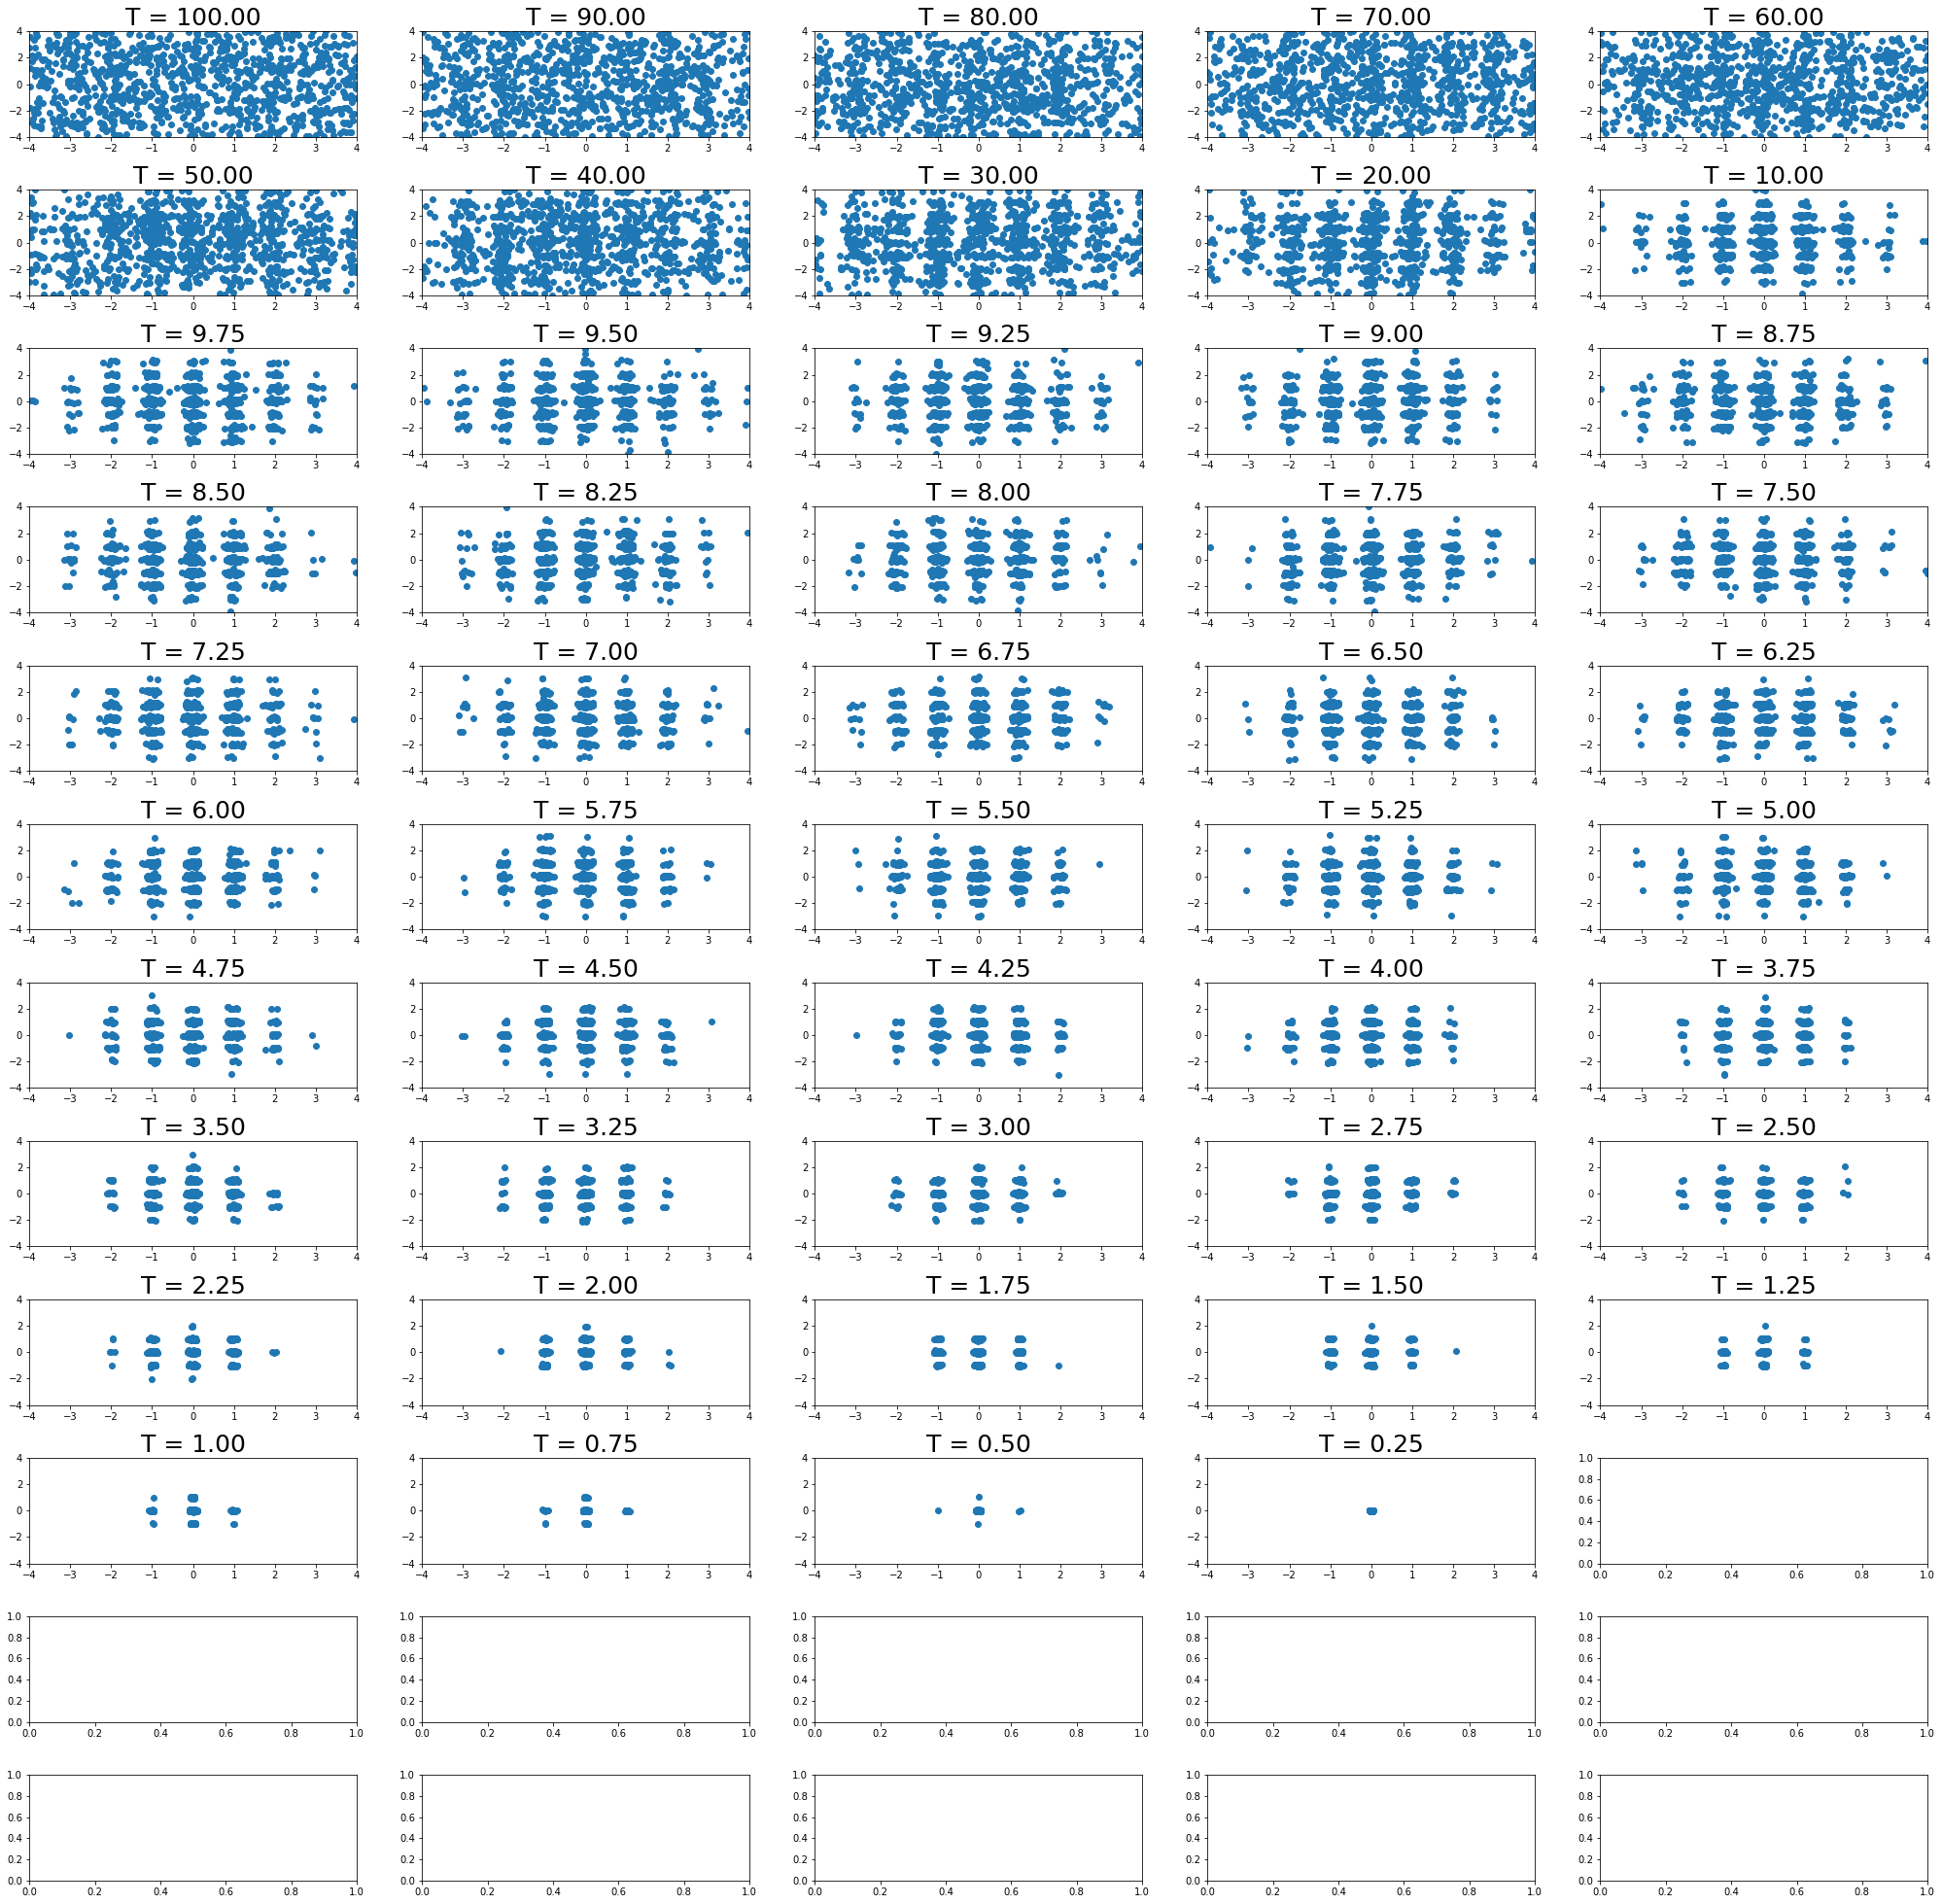

In [6]:
index = 0

fig, axs = plt.subplots(12, 5, figsize=(35, 35), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

axs = axs.ravel()

M = 3*10**4
eps = 2
z = np.arange(0., 110., 10.)

while T > 0.:
    while (i<M-1):
        # Pick random particle
        k = np.random.randint(N)
        state_particle_k = atoms[:,k]

        # Get new state of particle    
        new_state = state_particle_k + eps*(np.random.rand(4)-0.5)

        #If more probable, update
        if boltzmann_factor(new_state,T) >= boltzmann_factor(state_particle_k,T):    
            Delta_E = energy(new_state) - energy(state_particle_k) 
            eng[i+1] = eng[i] + Delta_E 

            atoms[:,k] = new_state



            i += 1
        # Otherwise, flip a bised coin
        else:
            r = np.random.rand()

            if boltzmann_factor(new_state,T) > r*boltzmann_factor(state_particle_k,T):    
                Delta_E = energy(new_state) - energy(state_particle_k) 
                eng[i+1] = eng[i] + Delta_E 

                atoms[:,k] = new_state



                i += 1   
            else:
                j += 1 
    
    if (abs(z - T) < .09).any() or  T < 10.:
        axs[index].plot(atoms[:][0], atoms[:][1], ls = 'None', marker = 'o')
        axs[index].set_title("T = %2.2f"%T, fontsize= 25)
        axs[index].set_ylim([-4,4])
        axs[index].set_xlim([-4,4])
        index += 1
    
    i = 0
    j = 0    
    T = T - 0.25
 
    

The algorithm found the correct global minima at $(x,y) =(0,0)$